<a href="https://colab.research.google.com/github/RevazRevazashvili/useful-codes/blob/main/foreign_alphabet_in_the_text_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def isRussian(text):
  pattern = re.compile(r'[а-яА-Я]+')
  return True if pattern.findall(text) else False

In [18]:
def isGeo(text):
  pattern = re.compile(r'[ა-ჰ]+')
  return True if pattern.findall(text) else False

In [32]:
def isEng(text):
  pattern = re.compile(r'[a-zA-Z]+')
  return True if pattern.findall(text) else False

In [13]:
df = pd.read_csv('combined-labeled-data.csv')

In [14]:
df.head()

,hate,female,filtered_text
0,1.0,0.0,ჩაიგდე ხმა შე მავნებელი ომი საქართველომ დაიწყო...
1,1.0,1.0,სამარცხვინო ქალო მიდი გაეკიდე ქაცარავას
2,0.0,0.0,იმოწმედეთ პრეზიდენტო
3,1.0,1.0,რა უზნეო ქალი ხარ არ იცი როგორ აურიო ქვეყანა გ...
4,1.0,0.0,Neta icodet mainc ras bjuturobt


In [35]:
rus_counter = 0
eng_counter = 0
for sentence in df['filtered_text']:
  if isRussian(sentence):
    rus_counter +=1
  if isEng(sentence):
    eng_counter +=1
if rus_counter==0:
  print('no russian letters in text')
if rus_counter==0 and eng_counter==0:
  print('no other language letters in text')
else:
  rus_perc = rus_counter/df.shape[0]
  eng_perc = eng_counter/df.shape[0]

no russian letters in text


In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data = df["Air Termination System"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Air Termination System', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

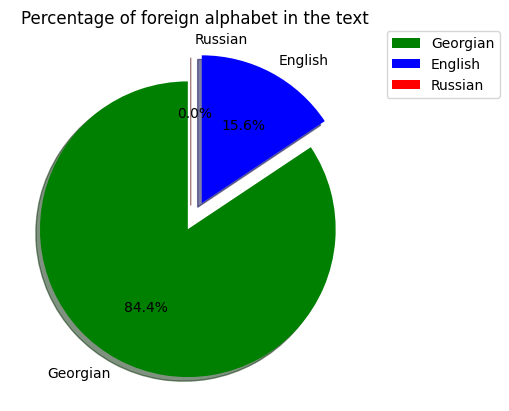

In [55]:
labels = ['Georgian', 'English', 'Russian']
colors = ['g','b','r']
ge = df.shape[0] - rus_counter+eng_counter
sizes = [ge, eng_counter, rus_counter]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Percentage of foreign alphabet in the text')
plt.show()